In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.shape

(7787, 12)

In [4]:
df.isnull().sum()/(len(df))*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [5]:
director = df.dropna(axis=1)
df.date_added.fillna("unknowm",inplace=True)

In [6]:
df = df.dropna( how='any',subset=['cast', 'director'])

In [7]:
import seaborn as sns

In [8]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         167
date_added        0
release_year      0
rating            4
duration          0
listed_in         0
description       0
dtype: int64

In [9]:
df['year'] = df.date_added.apply(lambda x:str(x).split(',')[-1])

In [10]:
df['year'].value_counts()

 2019    1395
 2020    1284
 2018    1139
 2017     771
 2016     211
 2021      87
 2015      51
 2014      14
 2011      13
 2013       7
 2012       3
 2009       2
 2008       1
 2010       1
Name: year, dtype: int64

In [11]:
df['year'] = df['year'].replace("unknown","2019")

In [12]:
df['year'].isnull().value_counts()

False    4979
Name: year, dtype: int64

In [13]:
df.country.value_counts()

United States                                          1656
India                                                   832
United Kingdom                                          174
Canada                                                  104
Egypt                                                    87
                                                       ... 
Uruguay, Argentina, Germany, Spain                        1
United Kingdom, India, United States                      1
Argentina, Brazil, France, Poland, Germany, Denmark       1
Denmark, Sweden, Israel, United States                    1
Chile, Spain, Argentina, Germany                          1
Name: country, Length: 544, dtype: int64

In [14]:
df['country'].fillna("United States",inplace=True)

In [15]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        0
listed_in       0
description     0
year            0
dtype: int64

In [16]:
df['rating'].isnull().value_counts()

False    4975
True        4
Name: rating, dtype: int64

In [17]:
df['rating'].value_counts()

TV-MA       1724
TV-14       1183
R            656
TV-PG        426
PG-13        378
PG           241
TV-Y          90
TV-G          85
TV-Y7         82
NR            62
G             38
UR             5
TV-Y7-FV       3
NC-17          2
Name: rating, dtype: int64

In [18]:
df['rating'].fillna("TV-MA",inplace=True)

In [19]:
df['year'] = df['year'].apply(lambda x:str(x).replace(" ",""))

In [20]:
df['rating'].isnull().value_counts()

False    4979
Name: rating, dtype: int64

In [21]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year            0
dtype: int64

In [22]:
df['listed_in'] = df['listed_in'].apply(lambda x:str(x).split(",")[0])

In [23]:
df['listed_in'].head()

1                    Dramas
2             Horror Movies
3        Action & Adventure
4                    Dramas
5    International TV Shows
Name: listed_in, dtype: object

In [24]:
df['type'].value_counts()

Movie      4834
TV Show     145
Name: type, dtype: int64

In [25]:
df['rating'].value_counts()

TV-MA       1728
TV-14       1183
R            656
TV-PG        426
PG-13        378
PG           241
TV-Y          90
TV-G          85
TV-Y7         82
NR            62
G             38
UR             5
TV-Y7-FV       3
NC-17          2
Name: rating, dtype: int64

In [26]:
movie_df = df[df['type']=="Movie"]
TV_df = df[df['type']=="TV Show"]

<AxesSubplot:xlabel='type', ylabel='count'>

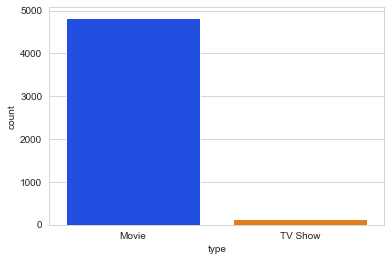

In [27]:
sns.set_style("whitegrid")
sns.countplot(x="type",data=df,palette="bright")

<AxesSubplot:xlabel='rating', ylabel='count'>

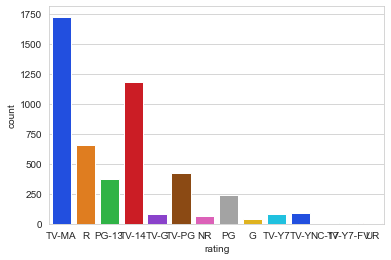

In [28]:
sns.countplot(x=df['rating'],data=movie_df,palette='bright')

<AxesSubplot:xlabel='rating', ylabel='count'>

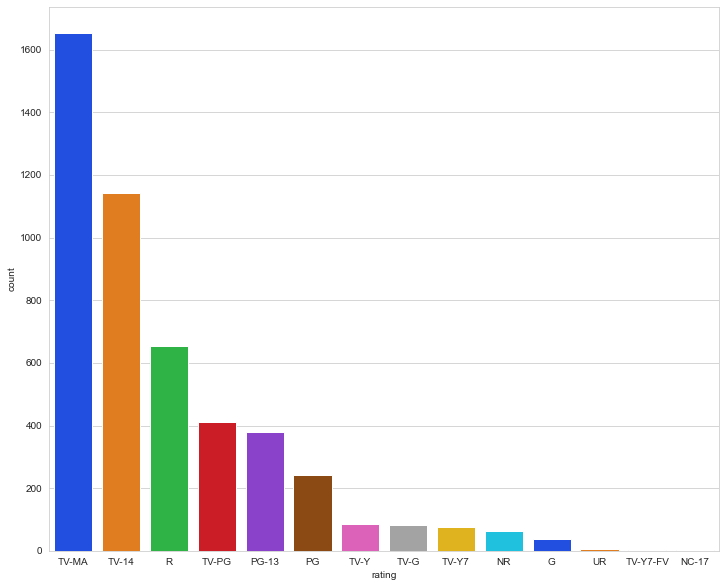

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
sns.countplot(x="rating", data= movie_df, palette="bright", order=movie_df['rating'].value_counts().index[0:15])

<AxesSubplot:xlabel='rating', ylabel='count'>

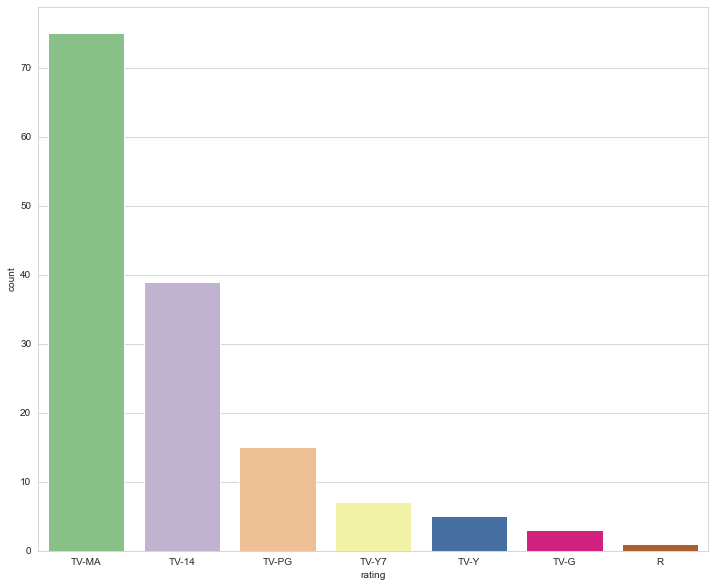

In [30]:
plt.figure(figsize=(12,10))
sns.countplot(x="rating", data= TV_df, palette="Accent", order=TV_df['rating'].value_counts().index[0:15])

<AxesSubplot:xlabel='count', ylabel='release_year'>

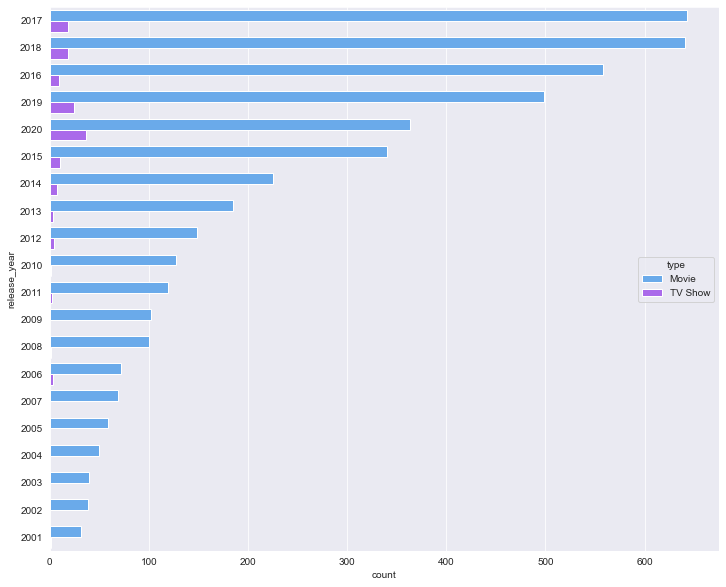

In [31]:
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.countplot(y="release_year",data=df,palette="cool",order=df['release_year'].value_counts().index[0:20],hue=df['type'])

In [32]:
import warnings
warnings.filterwarnings("ignore")
movie_df['duration']=movie_df['duration'].str.replace(' min','')
movie_df['duration']=movie_df['duration'].astype(str).astype(int)
movie_df['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7778     88
7780     94
7781     88
7782     99
7783    111
Name: duration, Length: 4834, dtype: int32

<AxesSubplot:xlabel='duration', ylabel='Density'>

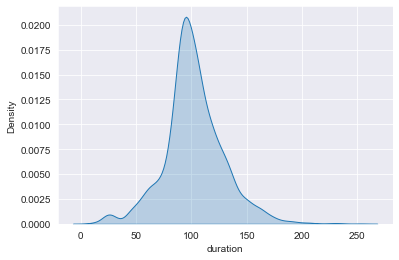

In [33]:
sns.set_style("darkgrid")
sns.kdeplot(data=movie_df["duration"],shade=True)

In [34]:
duration_year = movie_df.groupby("release_year").mean()
duration_year = duration_year.sort_index()

<AxesSubplot:xlabel='release_year'>

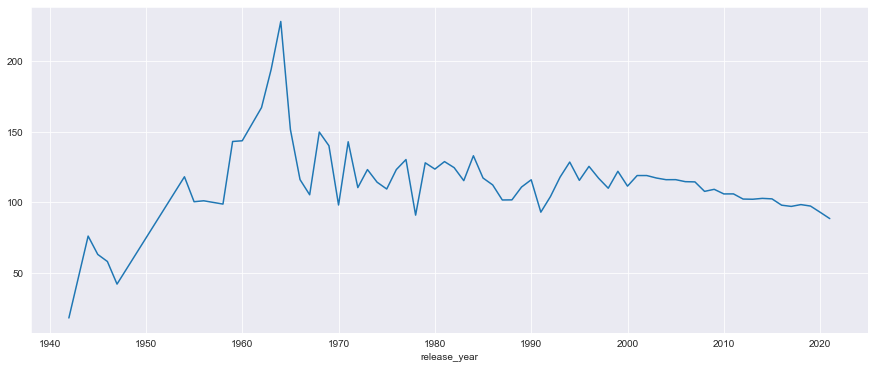

In [35]:
plt.figure(figsize=(15,6))
sns.lineplot(x=duration_year.index, y=duration_year.duration.values)

In [36]:
TV_df['duration']=TV_df['duration'].str.replace(' Season','')
TV_df['duration']=TV_df['duration'].str.replace('s','')
TV_df['duration']=TV_df['duration'].astype(str).astype(int)
TV_df['duration']

5       1
132     1
218     1
260     1
276     1
       ..
7385    1
7400    4
7492    1
7666    2
7721    2
Name: duration, Length: 145, dtype: int32

In [37]:
columns = ['title','duration']
tv_show = TV_df[columns]

In [38]:
tv_show = tv_show.sort_values(by='duration',ascending=False)
tv_show[0:20]

,title,duration
5912,Supernatural,15
4404,Naruto,9
1181,Call the Midwife,9
584,Arrow,8
6415,The Great British Baking Show,8
5291,Royal Pains,8
6359,The Flash,6
2130,Father Brown,6
1470,Comedians in Cars Getting Coffee,6
2313,Fullmetal Alchemist: Brotherhood,5


<AxesSubplot:xlabel='title'>

<Figure size 864x864 with 0 Axes>

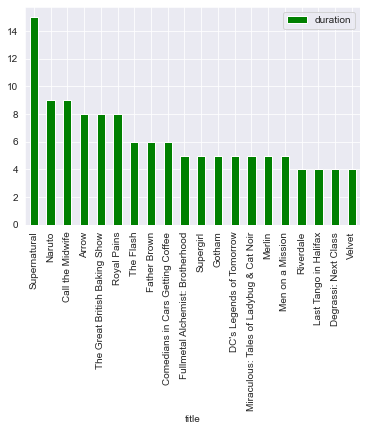

In [39]:
plt.figure(figsize=(12,12))
tv_show[:20].plot(kind='bar',x='title',y='duration',color='green')

In [40]:
df['description'].head()

1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
5    A genetics professor experiments with a treatm...
Name: description, dtype: object

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Define a TF-IDF Vectorizer Object. Remove all english stop words
tfidf = TfidfVectorizer(stop_words='english')

In [42]:
df['description'].fillna('',inplace=True)
tfidf_matrix = tfidf.fit_transform(df['description'])
tfidf_matrix.shape

(4979, 13910)

In [43]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [44]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [45]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [46]:
get_recommendations('#realityhigh')

4427    Natural Selection
4137           Miss India
6156      The Book of Sun
4989           Prom Night
6341     The F**k-It List
765                Battle
1145              Burning
7326             Uncorked
7662              Work It
5242            Rock On!!
Name: title, dtype: object

In [47]:
get_recommendations('PK')

133                                7 años
4803                               Payday
3478                    Kyaa Kool Hai Hum
1243                    Catching Feelings
3940    Mariah Carey's Merriest Christmas
2154                                Fifty
3703                                 Loev
1269                              Chameli
3576         LEGENDS OF THE HIDDEN TEMPLE
7754                                 Yuva
Name: title, dtype: object

In [48]:
features=['listed_in','director','cast','description','title']
filters = df[features]

In [49]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [50]:
# for feature in features:
#   filters[feature] = filters[feature].apply(lambda x:str(x).replace(" ",""))
# filters.head()
for feature in features:
    filters[feature] = filters[feature].apply(clean_data)
    
filters.head()

,listed_in,director,cast,description,title
1,dramas,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","afteradevastatingearthquakehitsmexicocity,trap...",7:19
2,horrormovies,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","whenanarmyrecruitisfounddead,hisfellowsoldiers...",23:59
3,action&adventure,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","inapostapocalypticworld,rag-dollrobotshideinfe...",9
4,dramas,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",abrilliantgroupofstudentsbecomecard-countingex...,21
5,internationaltvshows,serdarakar,"erdalbeşikçioğlu,yaseminallen,melisbirkan,sayg...",ageneticsprofessorexperimentswithatreatmentfor...,46


In [51]:
def create_soup(x):
    return x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [52]:
filters['soup'] = filters.apply(create_soup, axis=1)

In [53]:
filters.head()

,listed_in,director,cast,description,title,soup
1,dramas,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","afteradevastatingearthquakehitsmexicocity,trap...",7:19,"jorgemichelgrau demiánbichir,héctorbonilla,osc..."
2,horrormovies,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","whenanarmyrecruitisfounddead,hisfellowsoldiers...",23:59,"gilbertchan teddchan,stellachung,henleyhii,law..."
3,action&adventure,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","inapostapocalypticworld,rag-dollrobotshideinfe...",9,"shaneacker elijahwood,johnc.reilly,jennifercon..."
4,dramas,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",abrilliantgroupofstudentsbecomecard-countingex...,21,"robertluketic jimsturgess,kevinspacey,katebosw..."
5,internationaltvshows,serdarakar,"erdalbeşikçioğlu,yaseminallen,melisbirkan,sayg...",ageneticsprofessorexperimentswithatreatmentfor...,46,"serdarakar erdalbeşikçioğlu,yaseminallen,melis..."


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filters['soup'])

In [55]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_matrix,count_matrix)


In [56]:
filters

,listed_in,director,cast,description,title,soup
1,dramas,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","afteradevastatingearthquakehitsmexicocity,trap...",7:19,"jorgemichelgrau demiánbichir,héctorbonilla,osc..."
2,horrormovies,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","whenanarmyrecruitisfounddead,hisfellowsoldiers...",23:59,"gilbertchan teddchan,stellachung,henleyhii,law..."
3,action&adventure,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","inapostapocalypticworld,rag-dollrobotshideinfe...",9,"shaneacker elijahwood,johnc.reilly,jennifercon..."
4,dramas,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",abrilliantgroupofstudentsbecomecard-countingex...,21,"robertluketic jimsturgess,kevinspacey,katebosw..."
5,internationaltvshows,serdarakar,"erdalbeşikçioğlu,yaseminallen,melisbirkan,sayg...",ageneticsprofessorexperimentswithatreatmentfor...,46,"serdarakar erdalbeşikçioğlu,yaseminallen,melis..."
...,...,...,...,...,...,...
7778,comedies,rubenfleischer,"jesseeisenberg,woodyharrelson,emmastone,abigai...","lookingtosurviveinaworldtakenoverbyzombies,ado...",zombieland,"rubenfleischer jesseeisenberg,woodyharrelson,e..."
7780,dramas,shloksharma,"shashankarora,shwetatripathi,rahulkumar,gopalk...",adrugdealerstartshavingdoubtsabouthistradeashi...,zoo,"shloksharma shashankarora,shwetatripathi,rahul..."
7781,children&familymovies,peterhewitt,"timallen,courteneycox,chevychase,katemara,ryan...","draggedfromcivilianlife,aformersuperheromusttr...",zoom,"peterhewitt timallen,courteneycox,chevychase,k..."
7782,dramas,joseffares,"imadcreidi,antoinetteturk,eliasgergi,carmenleb...","whenlebanon'scivilwardepriveszozoofhisfamily,h...",zozo,"joseffares imadcreidi,antoinetteturk,eliasgerg..."


In [57]:
filters=filters.reset_index()
indices = pd.Series(filters.index, index=filters['title'])

In [99]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [100]:
get_recommendations_new('Black panther', cosine_sim2)

4247    Mowgli: Legend of the Jungle
1236                 Casino Tycoon 2
2837                     How It Ends
5750            Spenser Confidential
7392                   Vantage Point
718                     Bang Rajan 2
4607              Olympus Has Fallen
1569                     Da 5 Bloods
3006                        Inkheart
4667              Operation Chromite
Name: title, dtype: object

In [111]:
get_recommendations_new('PK', cosine_sim2)

100                         3 Idiots
6585    The Legend of Michael Mishra
552                Anthony Kaun Hai?
4278                  Mumbai Matinee
1004                    BluffMaster!
2149              Ferrari Ki Sawaari
1271                 Chance Pe Dance
1831                         Dostana
1878                           Drive
1940              Ek Main Aur Ekk Tu
Name: title, dtype: object

In [66]:
import pickle

In [62]:
pickle.dump(cosine_sim2, open("netflix_titles.pkl","wb"))

In [63]:
# loadedmodel = pickle.load(open("netflix_titles.pkl","rb"))

In [64]:
# loadedmodel.get_recommendations_new()